In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, json

# Compare the algorithms confidence in the DR5 false positives list against all DLAs found

In [133]:
false_pos_csv = '../../results/false_positives_DR5_v4.3.1_gen.csv'
results_json = '../../tmp/model_4.3.1_data_dr5/predictions.json'

false_pos_matrix = np.loadtxt(false_pos_csv, skiprows=1, delimiter=',')
with open(results_json, 'r') as f:
    results_array = json.load(f)

# generate a list of tuples:  [(false pos zabs, [list of result dlas])]
sl_per_fp = [(row[2], sl['id'], sl['dlas']) \
             for row in false_pos_matrix \
             for sl in results_array \
             if "%05d-%05d"%(row[5],row[6]) == sl['id']]
fp_dla_confidence = []
# pick out the closest matching dla comparing zabs with z_dla
for (zabs,id,dlas) in sl_per_fp:
    difflist = [abs(d['z_dla']-zabs) for d in dlas]
    minix = difflist.index(min(difflist))
    fp_dla_confidence.append(dlas[minix]['dla_confidence'])

# print len(dla_confidence), len(false_pos_matrix)
# fp_dla_confidence

all_dla_confidence = [dla['dla_confidence'] for sl in results_array for dla in sl['dlas']]

BINS=20
fp_hist = np.histogram(fp_dla_confidence, range=[0,1], bins=BINS)
all_hist = np.histogram(all_dla_confidence, range=[0,1], bins=BINS)


In [131]:
# all_hist[0] - fp_hist[0]
fp_hist[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2, 17,  5,  8,  7,  3, 17,
        5,  8,  8,  4,  8,  6,  8,  4,  7,  6,  3,  7,  2, 12,  6,  0,  5,
        5,  2,  4,  2,  2,  5,  6,  3,  3,  5,  1,  4,  2,  1,  3, 95])

(0, 150)

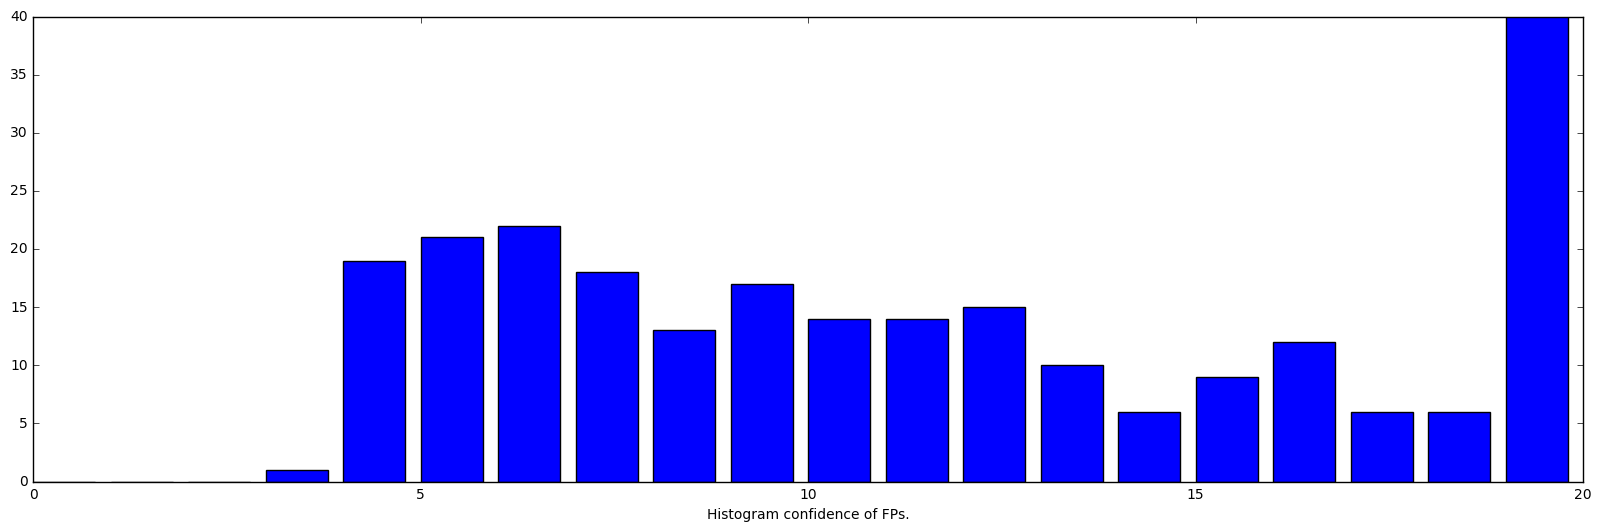

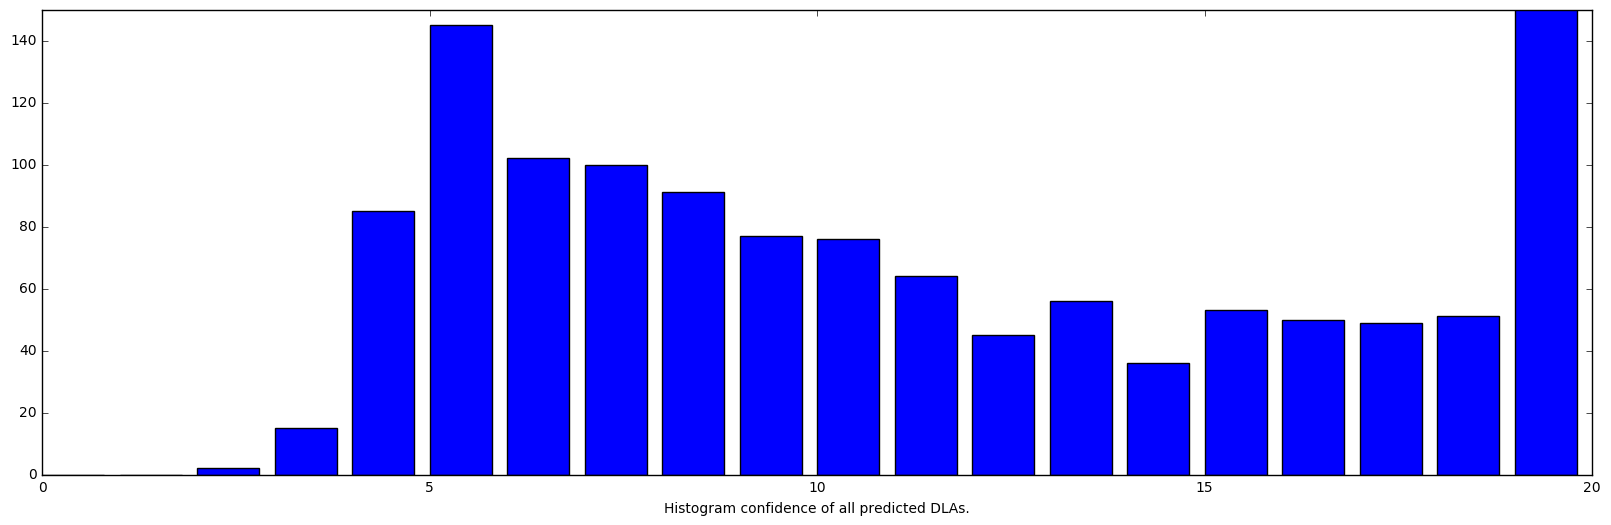

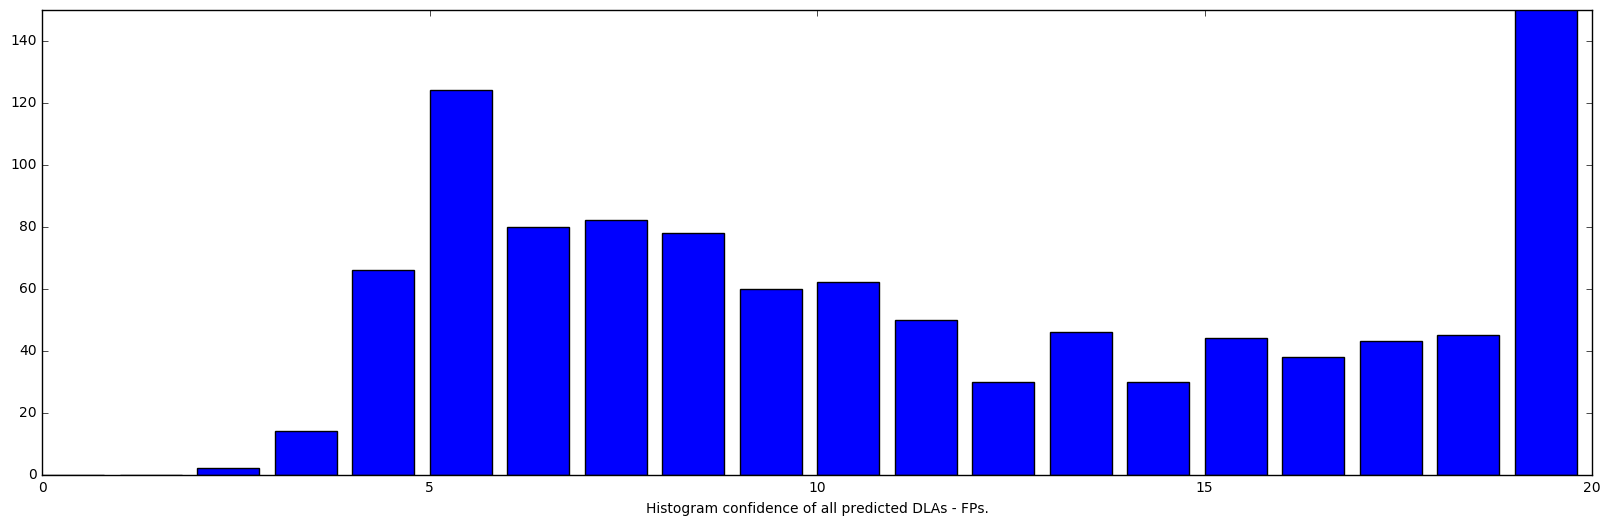

In [135]:
plt.figure(figsize=(20, 6))
# plt.hist(fp_dla_confidence, 50, facecolor='green', range=[0,1]);
plt.bar(range(BINS), fp_hist[0])
plt.xlabel("Histogram confidence of FPs.")
plt.ylim([0,40])

plt.figure(figsize=(20, 6))
# plt.hist(all_dla_confidence, 50, facecolor='green', range=[0,1]);
plt.bar(range(BINS), all_hist[0])
plt.xlabel("Histogram confidence of all predicted DLAs.")
plt.ylim([0,150])

plt.figure(figsize=(20, 6))
# plt.hist(all_dla_confidence, 50, facecolor='green', range=[0,1]);
plt.bar(range(BINS), all_hist[0]-fp_hist[0])
plt.xlabel("Histogram confidence of all predicted DLAs - FPs.")
plt.ylim([0,150])


In [139]:
# fp copy command
x = ["cp dla-spec-%05d-%05d.pdf false_pos"%(row[5],row[6]) for row in false_pos_matrix]
for i in x:
    print i

cp dla-spec-00273-00631.pdf false_pos
cp dla-spec-00278-00215.pdf false_pos
cp dla-spec-00278-00215.pdf false_pos
cp dla-spec-00278-00215.pdf false_pos
cp dla-spec-00278-00215.pdf false_pos
cp dla-spec-00279-00245.pdf false_pos
cp dla-spec-00290-00566.pdf false_pos
cp dla-spec-00309-00466.pdf false_pos
cp dla-spec-00310-00350.pdf false_pos
cp dla-spec-00360-00021.pdf false_pos
cp dla-spec-00367-00229.pdf false_pos
cp dla-spec-00372-00498.pdf false_pos
cp dla-spec-00375-00111.pdf false_pos
cp dla-spec-00380-00017.pdf false_pos
cp dla-spec-00385-00492.pdf false_pos
cp dla-spec-00385-00492.pdf false_pos
cp dla-spec-00385-00492.pdf false_pos
cp dla-spec-00385-00492.pdf false_pos
cp dla-spec-00385-00492.pdf false_pos
cp dla-spec-00416-00228.pdf false_pos
cp dla-spec-00437-00532.pdf false_pos
cp dla-spec-00444-00194.pdf false_pos
cp dla-spec-00446-00634.pdf false_pos
cp dla-spec-00450-00590.pdf false_pos
cp dla-spec-00452-00558.pdf false_pos
cp dla-spec-00454-00610.pdf false_pos
cp dla-spec-